<a href="https://colab.research.google.com/github/manujsinghwal/insights-from-uber-supply-and-demand-data/blob/main/insights_from_uber_supply_and_demand_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Insights From Uber Supply And Demand Data
Dataset: [uber.csv](https://drive.google.com/file/d/1eh_gE-4NdmYNbmxGAuiJ0B_ibURtoWwe/view?usp=sharing)

Using the provided dataset, answer the following asked questions.

In [1]:
# Mounting Google drive as 'uber.csv' file stored in a drive directory
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Data Exploration
Before diving into questions, first, let's analyze the dataset through some visualizations. Let's start with importing commonly used libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle, islice

In [14]:
# Reading csv file from Google drive directory
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/Dataset/uber.csv')

In [15]:
# First five records of datasets
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11


In [16]:
# Some basic info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              15 non-null     object
 1   Time (Local)      336 non-null    int64 
 2   Eyeballs          336 non-null    int64 
 3   Zeroes            336 non-null    int64 
 4   Completed Trips   336 non-null    int64 
 5   Requests          336 non-null    int64 
 6   Unique Drivers    336 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 18.5+ KB


As, we can see in the above cell's output, we have null values only in the `Date` column. If they are null continuously until the starting of the next day, we can use the forward fill method which replaces the NULL values with the value from the previous row.

In [17]:
df.head(18)

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11
5,NaN,12,12,0,2,2,11
6,NaN,13,9,1,0,0,9
7,NaN,14,12,1,0,0,9
8,NaN,15,11,2,1,2,7
9,NaN,16,11,2,3,4,6


Hence, our instinct was correct. Let's fill non-values using the forward fill method.

In [18]:
# Using forward fill method to fill NaN values with the value of previous row
df = df.fillna(method='ffill')
df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,10-Sep-12,8,6,0,2,2,14
2,10-Sep-12,9,8,3,0,0,14
3,10-Sep-12,10,9,2,0,1,14
4,10-Sep-12,11,11,1,4,4,11
...,...,...,...,...,...,...,...
331,24-Sep-12,2,3,3,0,2,0
332,24-Sep-12,3,3,3,0,1,0
333,24-Sep-12,4,1,1,0,0,0
334,24-Sep-12,5,4,2,1,1,3


In [19]:
# Now checking the current DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              336 non-null    object
 1   Time (Local)      336 non-null    int64 
 2   Eyeballs          336 non-null    int64 
 3   Zeroes            336 non-null    int64 
 4   Completed Trips   336 non-null    int64 
 5   Requests          336 non-null    int64 
 6   Unique Drivers    336 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 18.5+ KB


Now, we have the dataset without non-null values. Another thing that could be useful in the question part is creating timestamps with given date and time values. Let's create a timestamp column by using f-strings.

In [30]:
# Defining a function to create a new column for timestamp
def create_timestamp(date, time):
  return pd.to_datetime(f"{date} {time}:00:00")

# Applying function for each row
df['Timestamp'] = df.apply(lambda row: create_timestamp(row['Date'], row['Time (Local)']), axis=1)
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Timestamp
0,10-Sep-12,7,5,0,2,2,9,2012-09-10 07:00:00
1,10-Sep-12,8,6,0,2,2,14,2012-09-10 08:00:00
2,10-Sep-12,9,8,3,0,0,14,2012-09-10 09:00:00
3,10-Sep-12,10,9,2,0,1,14,2012-09-10 10:00:00
4,10-Sep-12,11,11,1,4,4,11,2012-09-10 11:00:00


## Data Explanation
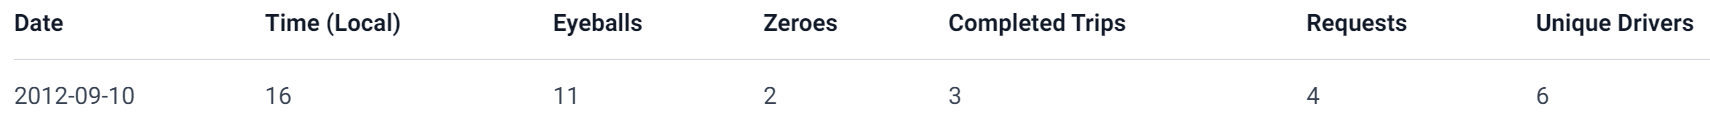
\
This means that during the hour beginning at 4pm (hour 16), on September 10th, 2012, 11 people opened the Uber app (Eyeballs). 2 of them did not see any car (Zeroes) and 4 of them requested a car (Requests). Of the 4 requests, only 3 complete trips actually resulted (Completed Trips). During this time, there were a total of 6 drivers who logged in (Unique Drivers).
\
\
It seems that, dataset is in good shape to analyze further questions. Next, we will do some visualization with the given dataset to explore more of the given overview for the dataset. We expect to see lots of eyeballs compared to other columns since some of them will be converted to zeroes, requests and completed trips. Let's plot these values with dates and see if is there any relation between them.



In [31]:
# Setting up the figure size for further visualizations
plt.rcParams["figure.figsize"] = (12,8)

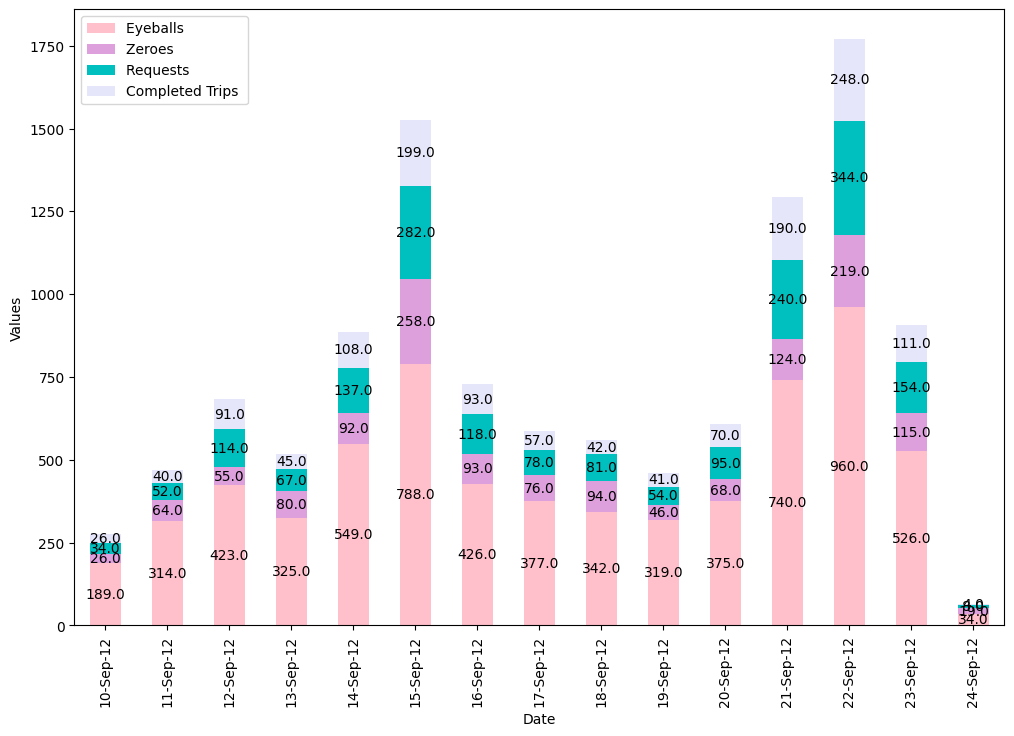

In [37]:
color_pallete = list(islice(cycle(['pink', 'plum', 'c', 'lavender']), None, len(df)))

ax = (
      df[['Date','Eyeballs ', 'Zeroes ', 'Requests ', 'Completed Trips ']]
      .groupby('Date')
      .sum()
      .reset_index()
      .plot(kind='bar', stacked=True, x='Date', color=color_pallete)
    )

for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]

    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center', fontsize=10)
plt.ylabel("Values")
plt.show()

The values against the date plot seem to kind of have weekly seasonality. We have a very short time interval to test it but still, we can check it by plotting against weekdays. For this purpose, we will use the .weekday attribute of pandas which will return an integer representing the corresponding weekday. We will aggregate and sum all values based on whether it falls under which weekday and plot.